## Machine Learning e Data Science com Python de A a Z
### Professor: Jones Granatyr (Curso na Udemy)
#### Estudante: Lucca de Sena Barbosa

Neste material, que desenvolvi com base no curso do professor Jones, vou compartilhar meu conhecimento sobre tudo que aprendi sobre Machine Learning. É importante destacar que estou criando este documento como forma de impulsionar meus conhecimentos sobre aprendizado de máquina. Caso alguém esteja interessado em se aprofundar no conteúdo, disponibilizo o link do curso logo abaixo:

https://www.udemy.com/share/101sO83@US23TajqwuGiCl1qlyuiV9hQGSvT7FLTWe0s7udWgCfZYaQ0D2C1-oxmnNGSat7siQ==/

Vamos realizar as previsões de renda de cada registro com base nos atributos previsores da base de dados do censo, utilizando dois algoritmos de aprendizagem de máquina:

    Naive Bayes
    Random Forest

Para entender como serão realizadas as previsões, irei separar os passos a seguir:

    1- Importação das Bibliotecas/Ferramentas.
    2- Importação da Base de Dados.
    3- Preparação do Pré-processamento com o OneHotEncoder().
    4- Separação da base de dados entre atributos previsores (X) e classes (Y).
    5- Realização do pré-processamento nos atributos previsores (X).
    6- Criação de variáveis de treinamento e de teste para os atributos previsores (X) e as classes (Y).
    7- Preparação dos modelos de aprendizado de máquina e realização do treinamento com base nas variáveis criadas no passo 6.

Com base nesses passos, será possível realizar o treinamento dos algoritmos na base de dados. No final do documento, mostraremos os resultados para certificar que o treinamento foi realizado corretamente.

Espero que este material ajude no conhecimento de cada um de vocês :D

### 1- ***Importação das Bibliotecas/Ferramentas.***

In [4]:
import pandas as pd

from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



### 2- ***Importação da Base de dados.***

> Importação da base de dados com a biblioteca pandas: 

In [5]:
base_census = pd.read_csv("census.csv")

>A função display é responsável por mostrar a base de dados.

In [6]:
display(base_census)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


>A chamada de função .info() é responsável por indicar o nome das colunas que representam os atributos previsores e as classes.

In [7]:
display(base_census.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

 ### 3- ***Preparar o pré-processamento com o OneHotEncoder().***

> Para começar o treinamento, utilizaremos um método chamado OneHotEncoder, responsável por transformar variáveis categóricas na base de dados em dígitos binários. Essa transformação torna-se essencial, pois posteriormente quando o treinamento for realizado de fato, é necessário que todos os valores na base de dados estejam em valores numéricos. Para o método se tornar eficiente, utilizaremos a função ColumnTransformer que irá aplicar o método OneHotEncoder nas colunas assumidas na lista abaixo, vale destacar que cada coluna na base de dados possuem seus índices assim como as listas. O parâmetro remainder='passthrough' indica que as colunas não especificadas na lista devem ser mantidas como estão, uma vez que já são valores numéricos.

In [8]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

### 4- ***Separar a base de dados entre atributos previsores(x) e as classes(y).***

>  Nessa instância, vamos estar dividindo a base de dados em atributos previsores, indicados como X_Census, e as classes, indicados com Y_census.

In [9]:
X_Census = base_census.iloc[:, 0:14].values
Y_Census = base_census.iloc[:, 14].values

### 5- ***Realizar o pré-processamento nos atributos previsores(x).***

> Para realizar o pré-processamento, temos que assumir que a variável na qual armazena os atributos previsores seja igual aos atributos previsores tranformados pela função OneHotEncoder. A transformação é realizada pelo '.fit_tranform' em um array através do 'toarray()'

In [10]:
X_Census = onehotencoder_census.fit_transform(X_Census).toarray()
display(X_Census)

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

 ### 6- ***Dividir a base de dados criando variáveis de treinamentos e de teste para os atributos previsores(x) e as classes(y).***

>  Para a criação das variáveis de treinamento e de teste, vamos chamar a função train_test_split(), que foi criada especificamente para essa finalidade. É importante destacar que a ordem das variáveis de treinamento e de teste deve ser seguida conforme o formato abaixo, pois é nessa ordem que a função direcionará os dados de treinamento e de teste. Caso a ordem não seja seguida, pode ocorrer, por exemplo, que os dados de treinamento sejam atribuídos à variável de teste. Dentro da função train_test_split(), deve ser passado como parâmetro o test_size= para indicar a proporção da base de dados que deve ser direcionada para a variável de teste. Além disso, é necessário passar as variáveis que armazenam os atributos previsores e as classes.

In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_Census, Y_Census, test_size=0.20)
display(x_treino.shape, x_teste.shape)

(26048, 108)

(6513, 108)

### 7- ***Preparar os modelos de aprendizado de máquina e realizar o treinamento com base nas variáveis criadas no passo 6.***

> Para preparar os algoritmos de aprendizagem de máquina, vamos atribuí-los a uma variável e, em seguida, realizar o treinamento utilizando a função .fit(), passando as variáveis de treinamento divididas anteriormente.


In [12]:
modelo_nb = GaussianNB()
modelo_nb.fit(x_treino, y_treino)

modelo_random = RandomForestClassifier(n_estimators=50, criterion='entropy')
modelo_random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

### 8- ***Verificação da Precisão dos Modelos de Aprendizagem de Máquina***

> Com o treinamento finalizado, é importante certificar que o modelo de aprendizado de máquina está realizando as previsões de maneira correta. Portanto, os resultados serão verificados logo abaixo.

>Nessa instância, os modelos de aprendizado de máquina estão realizando previsões de dados que não estiveram presentes no treinamento. Realizar o treinamento dessa forma é essencial, pois assim vamos nos certificar se os algoritmos aprenderam corretamente ou não. Um exemplo claro para entender o porque de utilizar dados que não estiverem presentes no treinamento é em uma prova escolar. Um professor que passa uma prova para os alunos com questões que estiverem na revisão não é uma maneira correta de medir o nível de aprendizado dos alunos, pois se eles apenas decorarem as respostas, isso não garante se os alunos aprenderam de fato ou não. Dessa mesma forma, ocorre com os algoritmos de aprendizado de máquina.

In [13]:
previsoes_nb = modelo_nb.predict(x_teste)
previsoes_random = modelo_random.predict(x_teste)

### 8.1- ***Função accuracy_score() e ConfusionMatrix()***
> A partir da *função accuracy_score()*, será retornado uma porcentagem de acerto comparando as previsões realizadas pelo algoritmo com o y_teste, que serve como uma espécie de gabarito das classes.
    
> A partir da *função ConfusionMatrix()*, será possível observar quantos registros o algoritmo acertou através de uma matriz.

#### **Naive Bayes**

'Naive Bayes: 79.48717948717949%'

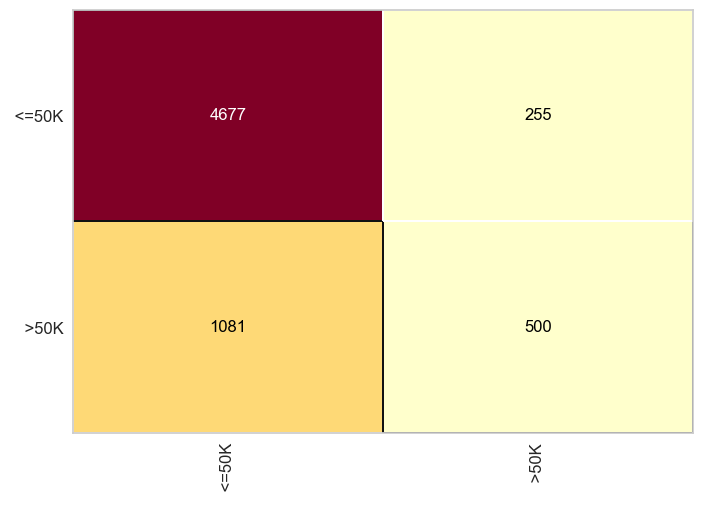

In [14]:
cm = ConfusionMatrix(modelo_nb)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)
display(f'Naive Bayes: {accuracy_score(y_teste, previsoes_nb)*100}%')


### **Random Forest**

'Random Forest: 85.62874251497006%'

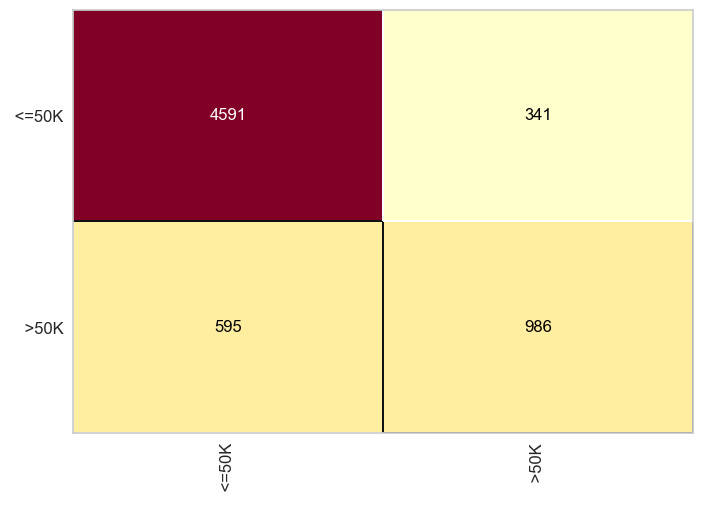

In [15]:
cm = ConfusionMatrix(modelo_random)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)
display(f'Random Forest: {accuracy_score(y_teste, previsoes_random)*100}%')

### ***Conclusão***

 > Com base nos resultados, é perceptível que o algoritmo que teve um melhor desempenho foi o Random Forest. Portanto, pode-se concluir que para novas previsões esse algoritmo pode ter uma chance de aproximadamente 85% de acertar a previsão de um novo registro. O algoritmo Naive Bayes também teve um ótimo desempenho, mas em comparação com esta base de dados, ficou evidente que o Random Forest se destacou.